In [ ]:
import sys
import os
os.chdir(os.path.dirname(os.getcwd()))
print("Current working directory:", os.getcwd())

from OptimisationScripts.OptimisationModel import OptimModel
from PreOptimisationDataStore.DefaultParameters import Default_Params
from StochasticScripts.ParetoFronts import ParetoFront
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import getcwd, chdir, environ, popen,system
from dill import dump   
from matplotlib import rcParams
print("Gurobi version:", popen('gurobi_cl --version').read())


Current working directory: /Users/cameronaldren/Documents/Git/StochasticOperaitonsModel


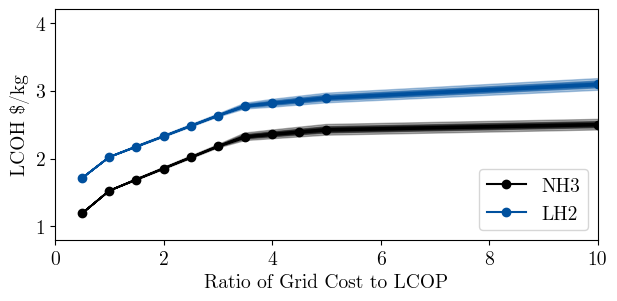

In [2]:
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['CMU Serif'] + rcParams['font.serif']
title='NH3_seed_deterministic_Wind_Pareto.csv'
title_2='LH2_seed_deterministic_Wind_Pareto.csv'
plot_1 = ParetoFront.plot_pareto_front(title, normaliser=(1,1),aspect=(7,3))
plot = ParetoFront.plot_pareto_front(title_2, normaliser=(1,1),aspect=(7,3),existing=plot_1)
  # Change the aspect ratio here
plot.legend(fontsize=14, loc='lower right')
plot.xlabel('Ratio of Grid Cost to LCOP', fontsize=14)
plot.ylabel('LCOH $/kg', fontsize=14)

#plot.title(title[:3]+' Wind Deterministic Dinklebach', fontsize=16)
plot.title('')
plot.xlim((0,10))
plot.ylim((0.8,4.2))

#plot.plot([0,20],[0,20], color='grey', linewidth=2, linestyle='--')

plot.tick_params(axis='both', which='major', labelsize=14)
plot.show()

In [3]:
df = pd.read_csv(getcwd() + '/DataAnalysis/LH2_seed_Wind_Pareto.csv')
df2 = pd.read_csv(getcwd() + '/DataAnalysis/NH3_seed_Wind_Pareto.csv')

In [4]:
means = {}
for j in range(len(df)):
    try:
        array = [float(i) for i in df.values[j][1:]]
        means[df.values[j][0]] = np.array(array).mean()
    except:
        pass

means2 = {}
diff = {}
for j in range(len(df2)):
    try:
        array = [float(i) for i in df2.values[j][1:]]
        means2[df2.values[j][0]] = np.array(array).mean()
        diff[df2.values[j][0]] = (means2[df2.values[j][0]] - means[df2.values[j][0]]) 
    except:
        pass

In [5]:
means

{"('random_seed', 2.0)": 2.7965623916227775,
 "('random_seed', 6.0)": 2.6395953641327106,
 "('random_seed', 12.0)": 2.784355586144468,
 "('random_seed', 24.0)": 3.0373237030341587,
 "('random_seed', 48.0)": 2.8517292790476545,
 "('random_seed', 72.0)": 2.8898344935392224,
 "('random_seed', 96.0)": 2.7584532885598385,
 "('random_seed', 120.0)": 3.0475010046315028,
 "('random_seed', 144.0)": 2.820517665397673,
 "('random_seed', 168.0)": 3.3084245292258605,
 "('random_seed', 360.0)": 2.8715507528621576,
 "('random_seed', 720.0)": 2.858124458619005}

In [6]:
np.array([*means.values()]).std()

0.16560891754776466

In [7]:
np.array([*means2.values()]).std()

0.15705183277105753

In [8]:
means = {}
for n in range(2,14):
    try:
        means[n] = np.mean([float(i) for i in df.iloc[n].values[1:]])
    except:
        pass

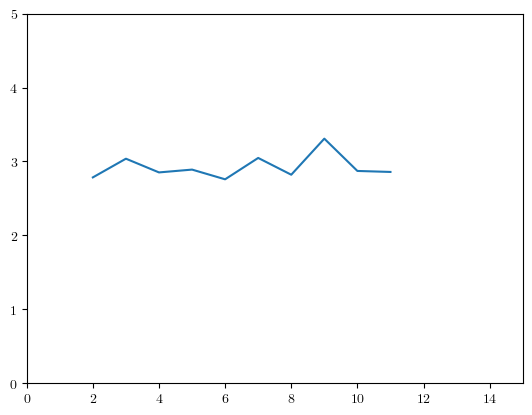

In [9]:
plt.plot(means.keys(),means.values())
plt.ylim((0,5))
plt.xlim((0,15))
plt.show()